# Multivariate forecasting 

The problem facing us aims to forecast the values of humidity according to the values of RH1, RH2, RH3, T etc 
This problem can be solved using Multivariate forecasting problems 

Before we begin, we must first take care to do a little analysis of the data we have in order to get an overview of it. 

In [28]:
import pandas as pd 
import numpy as np

In [60]:
data=pd.read_csv("data/Data_RH.csv", sep=";", header=0)

In [61]:
data.head(5)

,Dates,RH1,RH2,RH3,T,Label
0,01/01/2019 00:10,93.4,82.474,97.2,-1.988,93.6
1,01/01/2019 00:20,94.6,83.627,97.0,-2.197,93.2
2,01/01/2019 00:30,94.0,84.565,96.4,-2.114,93.1
3,01/01/2019 00:40,94.7,84.979,96.0,-2.256,92.8
4,01/01/2019 00:50,94.0,85.214,96.2,-2.411,92.7


## Features Engineering

In [62]:


class FeaturesEngineering():

    def __init__(self) -> None:
        pass


    def checkMissingValues(self, data):
        # Check missing values 
        columns= data.columns

        NanColumns =  [item for item in columns if data[item].isna().sum().sum()!=0]

        if len(NanColumns) == 0 :
            return " _______ No missing values in the data _____ "
        else : 
            text="--"
            for item in  NanColumns:
                
                text = text + item + "--"
            text 
            print( text + " contains missing values.")


    def checkDtypes(self,data):
        #Numerical variable 
        #categorical variable (nominal and ordinal)
        ind_num = np.isin(data.dtypes,['int16','int32','int64','float64','float16','float32'])
        indexCV=[i for i, b in enumerate(list(ind_num)) if b==False]
        columns=data.columns
        categoricalV= [columns[index] for index in indexCV]
        NumericalV=set(columns)-set(categoricalV)
        print(f"____Numerical variable : {list(NumericalV)} ____")
        print(f"____Numerical variable : {categoricalV} ___")

    def removeUnnecessaryColumns(self,data,UnnecessaryColumns):
        data.drop(UnnecessaryColumns, axis=1, inplace=True)
        print("Unnecessary Columns removed")


    
    def checkOutliers(self, data):
        # Check outliers
        ind_num = np.isin(data.dtypes,['int16','int32','int64','float64','float16','float32'])

        data=data.iloc[:,ind_num]
      
        mean = np.mean(data)
        std =  np.std(data)
        treshold = 3

        outliersDict={keys : [item  for item in data[keys] if np.abs((item - np.mean(data[keys]))/np.std(data[keys]))>treshold] for keys in data.columns}

        outliersCol=[keys for (keys , values) in outliersDict.items() if len(values)!=0]
      

        if len(outliersCol) == 0:
            print(" _______ No outliers in the columns _____ ")
        else:
            print(f"_______outliers columns : {outliersCol}_______")


    #Check low-variance features?
    def checkLowVariance(self, data,threshold):
        from sklearn.feature_selection import VarianceThreshold
        # Check outliers
        ind_num = np.isin(data.dtypes,['int16','int32','int64','float64','float16','float32'])

        data=data.iloc[:,ind_num]
        thresholder = VarianceThreshold(threshold=threshold)

        X_high_variance = thresholder.fit_transform(data)
        
        if len(X_high_variance[0])==len(data.columns):
            return  print(" _______ No Features have low-variance _____ ")
        else :
            print(" _______ Certains Features have low-variance _____ ")




In [63]:
parser = FeaturesEngineering()

### NAN values engineering 

In [64]:
parser.checkMissingValues(data)

' _______ No missing values in the data _____ '

### Outliers values engineering 
To determine whether the data contain outliers, we use the following techniques

1- Z-score 
2- Percentille 
In our side, we use Z-score wich is formalise as follow:for each variable denote X_j we perform the mean and the variance 
z-score of each value X_ij is X_ij-mean/var(Xj)
the treshold is 3 (that is third standard deviation )
 z-score_ij > 3 mean that X_ij is not an outlier values.

In [65]:
parser.checkOutliers(data)

/home/lnit/anaconda3/envs/lnitvenv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


 _______ No outliers in the columns _____ 


### Check Numerical and categorical values 

In [27]:
parser.checkDtypes(data)

____Numerical variable : ['RH2', 'RH1', 'T', 'Label', 'RH3']____
____Numerical variable : ['Dates']___


### Remove unnecessary columns 

In [ ]:
parser.removeUnnecessaryColumns(data,['Dates'])

In [59]:
parser.checkLowVariance(data,0.5)

 _______ No Features have low-variance _____ 


## general statistics to see if the data have a normal distribution

In [47]:
import seaborn as sns

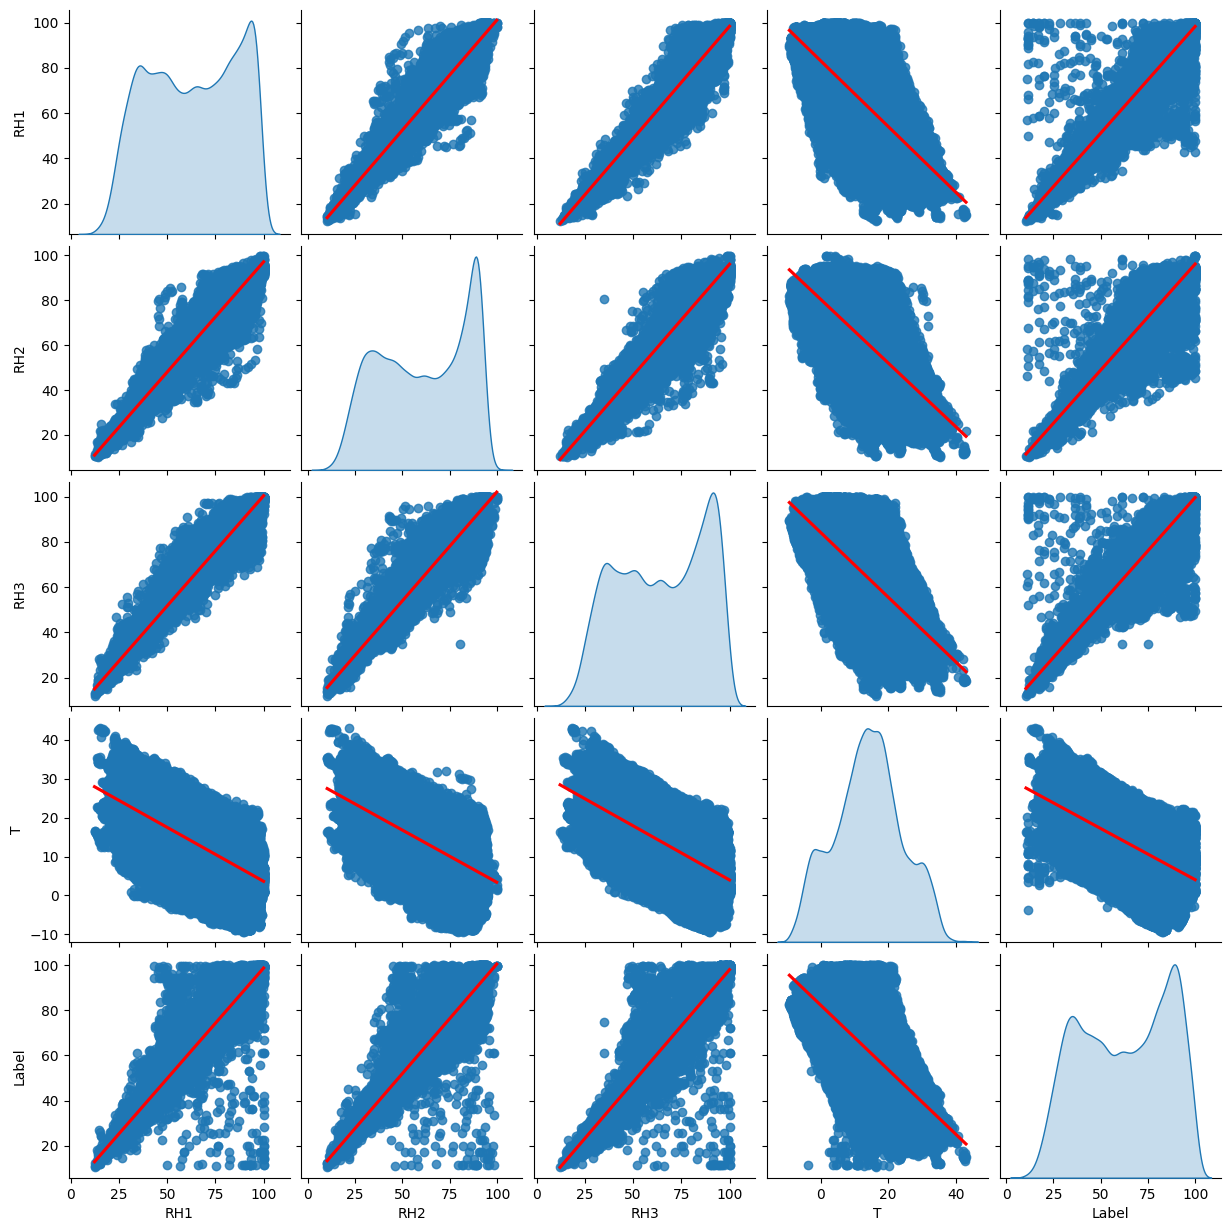

In [55]:
sns.pairplot(data,kind='reg', diag_kind='kde',plot_kws={'line_kws':{'color':'red'}})

These Numerical input variables  have not a highly skewed or non-standard distribution
sometime this problem is due to  outliers in the data, multi-modal distributions, highly exponential distributions, and more.
It is normally distributed. 

## Model with Normalization vs Model with Standardization, which one is better for our data ?

In [41]:
# Libraries

# Scale the data
from sklearn.preprocessing import StandardScaler ,MinMaxScaler

# Pipeline, Gridsearch, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
# Plot the confusion matrix at the end of the tutorial
#from sklearn.metrics import plot_confusion_matrix

# Regression Models
from sklearn.linear_model import LogisticRegression , LinearRegression ,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

#Metrics 
from sklearn.metrics import r2_score


In [47]:
class PIPELINEGRIDSEARCH():

    def __init__(self) -> None:
        pass

    def split(self, Label_Name, fix_random_state=14, shuffle=True):

        # Set variables for the targets and features
        y = data[Label_Name]
        X = data.drop(Label_Name, axis=1)
        X = data.drop("Dates", axis=1)
        # Split the data into training test sets
        X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=fix_random_state,shuffle = shuffle)

        return X_train, X_test, y_train, y_test 

    def PipelineGridSearch(self,dict={"Model1":{'scl': StandardScaler(),'GBR': GradientBoostingRegressor()},
                        "Model2":{'scl': StandardScaler(), 'LRR':LinearRegression()},
                        "Model3":{'scl': StandardScaler(), 'DTR':DecisionTreeRegressor(random_state=42)},
                        "Model4":{'scl': StandardScaler(), 'SVR': SVR()},
                        "Model5":{'scl': StandardScaler(), 'LSO': Lasso(random_state=42)},
                        "Model6":{'scl': StandardScaler(), 'RDE':  Ridge(random_state=42)},
                        "Model7":{'scl': StandardScaler(),"ENET":ElasticNet(random_state=42)},
                        "Model8":{'mms': MinMaxScaler(),'GBR': GradientBoostingRegressor()},
                        "Model9":{'mms': MinMaxScaler(), 'LRR':LinearRegression()},
                        "Model10":{'mms': MinMaxScaler(), 'DTR':DecisionTreeRegressor(random_state=42)},
                        "Model11":{'mms': MinMaxScaler(), 'SVR': SVR()},
                        "Model12":{'mms': MinMaxScaler(), 'LSO': Lasso(random_state=42)},
                        "Model13":{'mms': MinMaxScaler(), 'RDE':  Ridge(random_state=42)},
                        "Model14":{'mms': MinMaxScaler(),"ENET":ElasticNet(random_state=42)}},grid_dict = {1: 'Gradient Boosting Regressor scl', 
                        2: 'Linear Regression scl', 3: 'Decision Tree Regressor scl', 4: 'Support Vector Regressor scl', 
                        5: 'Lasso scl', 6: 'Ridge scl',7:'Elastic Net scl',8: 'Gradient Boosting Regressor mms', 
                        9: 'Linear Regression mms', 10: 'Decision Tree Regressor mms', 11: 'Support Vector Regressor mms', 
                        12: 'Lasso mms', 13: 'Ridge mms', 14:'Elastic Net mms',},Label_Name="Label"):

        pipe_1 = Pipeline(list(dict["Model1"].items()))
        pipe_2 = Pipeline(list(dict["Model2"].items()))
        pipe_3= Pipeline(list(dict["Model3"].items()))
        pipe_4= Pipeline(list(dict["Model4"].items()))
        pipe_5= Pipeline(list(dict["Model5"].items()))
        pipe_6= Pipeline(list(dict["Model6"].items()))
        pipe_7= Pipeline(list(dict["Model7"].items()))
        pipe_8= Pipeline(list(dict["Model8"].items()))
        pipe_9= Pipeline(list(dict["Model9"].items()))
        pipe_10= Pipeline(list(dict["Model10"].items()))
        pipe_11= Pipeline(list(dict["Model11"].items()))
        pipe_12= Pipeline(list(dict["Model12"].items()))
        pipe_13= Pipeline(list(dict["Model13"].items()))
        pipe_14= Pipeline(list(dict["Model14"].items()))
     
        param_range = [1, 2, 3, 4, 5, 6],
        param_range_fl = [1.0, 0.5, 0.1],
        alpha=[0.1,0.2,0.5,0.3],
        C=[1.0, 0.5, 0.1],
        gamma=[1e-7, 1e-4],
        epsilon=[0.1,0.2,0.5,0.3]
        
      
        Model1_param_grid = [{'GBR__learning_rate': [0.01,0.02,0.03,0.04],
                  'GBR__subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'GBR__n_estimators' : [100,500,1000, 1500],
                  'GBR__max_depth'    : [4,6,8,10]
                 }]

        Model2_param_grid=[{'LRR__fit_intercept':[True,False] 
                        , 'LRR__copy_X':[True, False]}]  

        Model3_param_grid = [{"DTR__criterion": ["mse", "mae"],
                        "DTR__min_samples_split": [10, 20, 40],
                        "DTR__max_depth": [2, 6, 8],
                        "DTR__min_samples_leaf": [20, 40, 100],
                        "DTR__max_leaf_nodes": [5, 20, 100],
                        }]  

        Model4_param_grid = [{'SVR__kernel': ('linear', 'rbf','poly'), 'SVR__C':C,
                         'SVR__gamma': gamma,'SVR__epsilon':epsilon}]
        
        Model5_param_grid = [{'LSO__alpha':alpha}]
        
        Model6_param_grid = [{'RDE__alpha':alpha}]

        Model7_param_grid = [{'ENET__alpha':alpha}]
        

        Model1_grid_search = GridSearchCV(estimator=pipe_1,
        param_grid=Model1_param_grid,
        scoring='accuracy',
        cv=3)

        Model2_grid_search = GridSearchCV(estimator=pipe_2,
        param_grid=Model2_param_grid,
        scoring='accuracy',
        cv=3)

        Model3_grid_search = GridSearchCV(estimator=pipe_3,
        param_grid=Model3_param_grid,
        scoring='accuracy',
        cv=3)

        Model4_grid_search = GridSearchCV(estimator=pipe_4,
        param_grid=Model4_param_grid,
        scoring='accuracy',
        cv=3)

        Model5_grid_search = GridSearchCV(estimator=pipe_5,
        param_grid=Model5_param_grid,
        scoring='accuracy',
        cv=3)

        Model6_grid_search = GridSearchCV(estimator=pipe_6,
        param_grid=Model6_param_grid ,
        scoring='accuracy',
        cv=3)

        Model7_grid_search = GridSearchCV(estimator=pipe_7,
        param_grid=Model7_param_grid,
        scoring='accuracy',
        cv=3)

        # Model with min max scaler hyperparameters finetuning
        Model8_grid_search = GridSearchCV(estimator=pipe_8,
        param_grid=Model1_param_grid,
        scoring='accuracy',
        cv=3)

        Model9_grid_search = GridSearchCV(estimator=pipe_9,
        param_grid=Model2_param_grid,
        scoring='accuracy',
        cv=3)

        Model10_grid_search = GridSearchCV(estimator=pipe_10,
        param_grid=Model3_param_grid,
        scoring='accuracy',
        cv=3)

        Model11_grid_search = GridSearchCV(estimator=pipe_11,
        param_grid=Model4_param_grid,
        scoring='accuracy',
        cv=3)

        Model12_grid_search = GridSearchCV(estimator=pipe_12,
        param_grid=Model5_param_grid,
        scoring='accuracy',
        cv=3)

        Model13_grid_search = GridSearchCV(estimator=pipe_13,
        param_grid=Model6_param_grid ,
        scoring='accuracy',
        cv=3)

        Model14_grid_search = GridSearchCV(estimator=pipe_14,
        param_grid=Model7_param_grid,
        scoring='accuracy',
        cv=3)

        grids = [Model1_grid_search, Model2_grid_search, Model3_grid_search, Model4_grid_search, Model5_grid_search, Model6_grid_search, Model7_grid_search]
        X_train, X_test, y_train, y_test  = self.split(Label_Name)
        for pipe in grids:
            pipe.fit(X_train,y_train)

        for i, model in enumerate(grids):
            print('{} Test Accuracy: {}'.format(grid_dict[i],
            model.score(X_test,y_test)))
            print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))


       



In [49]:
parser=PIPELINEGRIDSEARCH()
parser.PipelineGridSearch()

/home/lnit/anaconda3/envs/lnitvenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lnit/anaconda3/envs/lnitvenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/lnit/anaconda3/envs/lnitvenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/home/lnit/anaconda3/envs/lnitvenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/lnit/anaconda3/envs/lnitvenv/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/home/lnit/anaconda3/envs/lnitvenv/lib/python3

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].